# Análise de Assortatividade em Grafos de Ingredientes da Culinária Brasileira

### Maria Eduarda Lima da Luz
**Engenharia da Computação - UFRN**



## Leitura da Base de Dados

Nesta etapa, foi realizada a leitura do arquivo `Ingredientes.csv`, que contém 51 pratos populares da culinária brasileira. A base inclui o nome da receita, a lista de ingredientes principais, a classificação dos tipos de ingredientes e o estado ou região de origem do prato.

A visualização inicial dos dados permite verificar se o arquivo foi carregado corretamente e entender a estrutura que será utilizada para a construção do grafo de co-ocorrência de ingredientes.




In [3]:
import pandas as pd

# Lendo o CSV
df = pd.read_csv('Ingredientes.csv')

# Visualizando as primeiras linhas
df.head()


,nome_receita,ingredientes,tipos_ingredientes,estado_origem
0,Feijoada,"feijão preto, carne seca, linguiça calabresa, ...","leguminosa, proteína, gordura, carboidrato, ve...",Rio de Janeiro (RJ)
1,Moqueca Baiana,"peixe, leite de coco, azeite de dendê, cebola,...","proteína, gordura, vegetal, condimento",Bahia (BA)
2,Moqueca Capixaba,"peixe, azeite, cebola, tomate, coentro, urucum...","proteína, gordura, vegetal, condimento",Espírito Santo (ES)
3,Baião de Dois,"arroz, feijão verde, carne seca, queijo coalho...","carboidrato, leguminosa, proteína, laticínio, ...",Ceará (CE)
4,Vatapá,"pão, leite de coco, azeite de dendê, camarão, ...","carboidrato, gordura, proteína, condimento",Bahia (BA)


## Construção do Grafo de Co-ocorrência de Ingredientes

Nesta etapa, foi construído um grafo utilizando a biblioteca NetworkX.

- Cada **nó** do grafo representa um ingrediente.
- As **arestas** conectam ingredientes que aparecem juntos em uma mesma receita, formando um grafo de co-ocorrência.
- Cada nó terá um atributo chamado `tipo`, que corresponde à categoria do ingrediente (ex: proteína, carboidrato, vegetal, etc.).

Inicialmente, todas as receitas da base de dados foram percorridas para:
1. Adicionar os ingredientes como nós no grafo.
2. Criar conexões (arestas) entre os ingredientes que co-ocorrem em cada prato.

Este grafo será a base para a análise de assortatividade, onde será investigado se a culinária brasileira tende a combinar ingredientes do mesmo tipo (homofilia) ou de tipos diferentes (heterofilia).


In [4]:
import networkx as nx

# Criar um grafo vazio
G = nx.Graph()

# Iterar sobre as receitas para adicionar os nós e as arestas
for index, row in df.iterrows():
    ingredientes = [i.strip() for i in row['ingredientes'].split(',')]
    tipos = [t.strip() for t in row['tipos_ingredientes'].split(',')]

    # Mapeando cada ingrediente ao seu tipo (de forma simplificada)
    for ing in ingredientes:
        if ing not in G:
            # Aqui estamos colocando o tipo como 'Outro' inicialmente
            G.add_node(ing, tipo='Outro')

    # Criar arestas entre todos os ingredientes da mesma receita
    for i in range(len(ingredientes)):
        for j in range(i + 1, len(ingredientes)):
            G.add_edge(ingredientes[i], ingredientes[j])


## Verificação da Estrutura do Grafo

Após a construção do grafo de co-ocorrência, é importante verificar se a estrutura foi criada corretamente.

Foram utilizadas as funções `number_of_nodes()` e `number_of_edges()` da biblioteca NetworkX para identificar:

- **Número de Nós**: corresponde à quantidade total de ingredientes únicos presentes no grafo.
- **Número de Arestas**: representa o total de conexões entre ingredientes que aparecem juntos nas receitas.

Essa verificação inicial garante que todos os ingredientes foram inseridos e conectados de acordo com as co-ocorrências na base de dados.


In [5]:
print(f"Número de ingredientes (nós): {G.number_of_nodes()}")
print(f"Número de conexões (arestas): {G.number_of_edges()}")

Número de ingredientes (nós): 93
Número de conexões (arestas): 361


## Geração do Dicionário de Classificação dos Ingredientes

---



De acordo com os requisitos do trabalho, foi necessário classificar cada ingrediente em uma das categorias pré-definidas:
**Proteína, Carboidrato, Vegetal, Fruta, Laticínio, Gordura, Condimento, Leguminosa** ou **Outro**.

Como a base de dados contém apenas a lista de ingredientes e os tipos gerais por receita, foi utilizado o modelo de linguagem **ChatGPT** para auxiliar na criação de um dicionário que associa cada ingrediente ao seu respectivo tipo de forma individual.

Este dicionário foi gerado com base no conhecimento culinário do modelo e ajustado conforme as categorias exigidas pela análise de assortatividade. Ingredientes não contemplados foram classificados como 'Outro'.

A seguir, apresentamos o dicionário `ingrediente_tipo_manual` contendo essa classificação.


In [6]:
ingrediente_tipo_manual = {
    'feijão preto': 'leguminosa',
    'carne seca': 'proteína',
    'linguiça calabresa': 'proteína',
    'costelinha de porco': 'proteína',
    'bacon': 'gordura',
    'arroz': 'carboidrato',
    'couve': 'vegetal',
    'farofa': 'carboidrato',
    'alho': 'condimento',
    'cebola': 'condimento',
    'folha de louro': 'condimento',
    'tomate': 'vegetal',
    'peixe': 'proteína',
    'leite de coco': 'gordura',
    'azeite de dendê': 'gordura',
    'pimentão': 'vegetal',
    'coentro': 'condimento',
    'urucum': 'condimento',
    'feijão verde': 'leguminosa',
    'queijo coalho': 'laticínio',
    'pão': 'carboidrato',
    'camarão': 'proteína',
    'amendoim': 'outro',
    'castanha': 'outro',
    'mandioca': 'carboidrato',
    'frango': 'proteína',
    'açafrão': 'condimento',
    'bucho': 'proteína',
    'ovo': 'proteína',
    'banana': 'fruta',
    'farinha de mandioca': 'carboidrato',
    'sal grosso': 'condimento',
    'cenoura': 'vegetal',
    'ervilha': 'vegetal',
    'uva passa': 'fruta',
    'batata': 'carboidrato',
    'maionese': 'gordura',
    'fubá': 'carboidrato',
    'óleo': 'gordura',
    'massa de lasanha': 'carboidrato',
    'molho de tomate': 'vegetal',
    'presunto': 'proteína',
    'massa de pastel': 'carboidrato',
    'bacalhau': 'proteína',
    'polvilho': 'carboidrato',
    'requeijão': 'laticínio',
    'milho': 'vegetal',
    'hortelã': 'condimento',
    'trigo para kibe': 'carboidrato',
    'camarão seco': 'proteína',
    'barriga de porco': 'gordura',
    'farinha de trigo': 'carboidrato',
    'açúcar': 'condimento',
    'leite condensado': 'laticínio',
    'chocolate': 'condimento',
    'coco ralado': 'fruta',
    'gema de ovo': 'proteína',
    'fermento': 'condimento',
    'canela': 'condimento',
    'milho branco': 'carboidrato',
    'goiaba': 'fruta',
    'goma de tapioca': 'carboidrato',
    'flocão de milho': 'carboidrato',
    'açaí': 'fruta',
    'granola': 'carboidrato',
    'limão': 'fruta',
    'cachaça': 'outro',
    'picanha': 'proteína',
    'massa': 'carboidrato',
    'macarrão': 'carboidrato',
    'trigo': 'carboidrato',
    'carne moída': 'proteína',
    'massa de empada': 'carboidrato',
    'flocão': 'carboidrato',
    'farinha': 'carboidrato',
    'coco': 'fruta',
    'sal': 'condimento',
    'leite': 'laticínio',
    'queijo': 'laticínio',
    'carne bovina': 'proteína',
    'carne moída': 'proteína',
    'aipim': 'carboidrato',
    'carne de sol': 'proteína',
    'salsa': 'condimento',
    'azeite': 'gordura',
    'linguiça': 'proteína',
    'feijão': 'leguminosa',
    'feijão branco': 'leguminosa',
    'feijão fradinho': 'leguminosa',
    'quiabo': 'vegetal',
    'milho': 'vegetal',
    'ovos': 'proteína',
    'queijo ralado': 'laticínio',
    'manteiga': 'gordura',
    'manteiga de garrafa': 'gordura',
    'sal': 'condimento'
}


## Atribuição dos Tipos aos Nós do Grafo

Com o dicionário `ingrediente_tipo_manual` definido, foi realizada a atribuição do atributo `tipo` para cada ingrediente no grafo.

Todos os nós foram percorrido e, para cada ingrediente, foi associado seu tipo conforme o dicionário gerado. Caso algum ingrediente não esteja presente no dicionário, ele será automaticamente classificado como **'Outro'**.

Essa etapa é fundamental para permitir o cálculo correto da assortatividade baseada nos tipos de ingredientes.


In [7]:
for node in G.nodes():
    tipo = ingrediente_tipo_manual.get(node, 'Outro')  # Se não encontrar, marca como 'Outro'
    G.nodes[node]['tipo'] = tipo

### Verificação da Atribuição dos Tipos

Para garantir que os tipos foram corretamente atribuídos aos nós do grafo, foi realizada uma verificação pontual em alguns ingredientes.


In [8]:
# Exemplo: Mostrar o tipo de alguns ingredientes
ingredientes_teste = ['feijão preto', 'arroz', 'bacon', 'camarão', 'banana']

for ing in ingredientes_teste:
    print(f"{ing}: {G.nodes[ing]['tipo']}")


feijão preto: leguminosa
arroz: carboidrato
bacon: gordura
camarão: proteína
banana: fruta


## Cálculo do Coeficiente de Assortatividade

Com o grafo finalizado e cada ingrediente devidamente classificado por tipo, foi realizado o cálculo do **coeficiente de assortatividade** utilizando a função `attribute_assortativity_coefficient` da biblioteca NetworkX.

Este coeficiente indica a tendência de conexão entre ingredientes do mesmo tipo ou de tipos diferentes:

- **Próximo de 1**: Ingredientes do mesmo tipo tendem a se conectar (**homofilia**).
- **Próximo de 0**: As conexões ocorrem de forma aleatória.
- **Valor negativo**: Ingredientes de tipos diferentes tendem a se conectar (**heterofilia**).


In [9]:
assortatividade = nx.attribute_assortativity_coefficient(G, 'tipo')
print(f"Coeficiente de Assortatividade por Tipo: {assortatividade:.4f}")

Coeficiente de Assortatividade por Tipo: -0.0752


## Conclusão da Análise de Assortatividade

O coeficiente de assortatividade obtido foi **-0.0748**, indicando uma tendência **moderada à heterofilia**.

Esse resultado reforça que a culinária brasileira valoriza a combinação de ingredientes de **tipos diferentes**, como proteínas com carboidratos, vegetais com condimentos, e assim por diante. A diversidade de sabores e texturas é uma marca registrada da gastronomia do país.

Apesar do valor negativo, ele continua próximo de zero, o que demonstra flexibilidade nas combinações, sem uma segregação rígida entre os tipos de ingredientes.



## Visualização do Grafo de Co-ocorrência

A seguir, é possivel visualizar o grafo de co-ocorrência de ingredientes utilizando as bibliotecas `networkx` e `matplotlib`.

Esta visualização tem como objetivo proporcionar uma leitura mais clara da rede de co-ocorrência de ingredientes, evidenciando as conexões e os tipos de ingredientes por meio das cores.


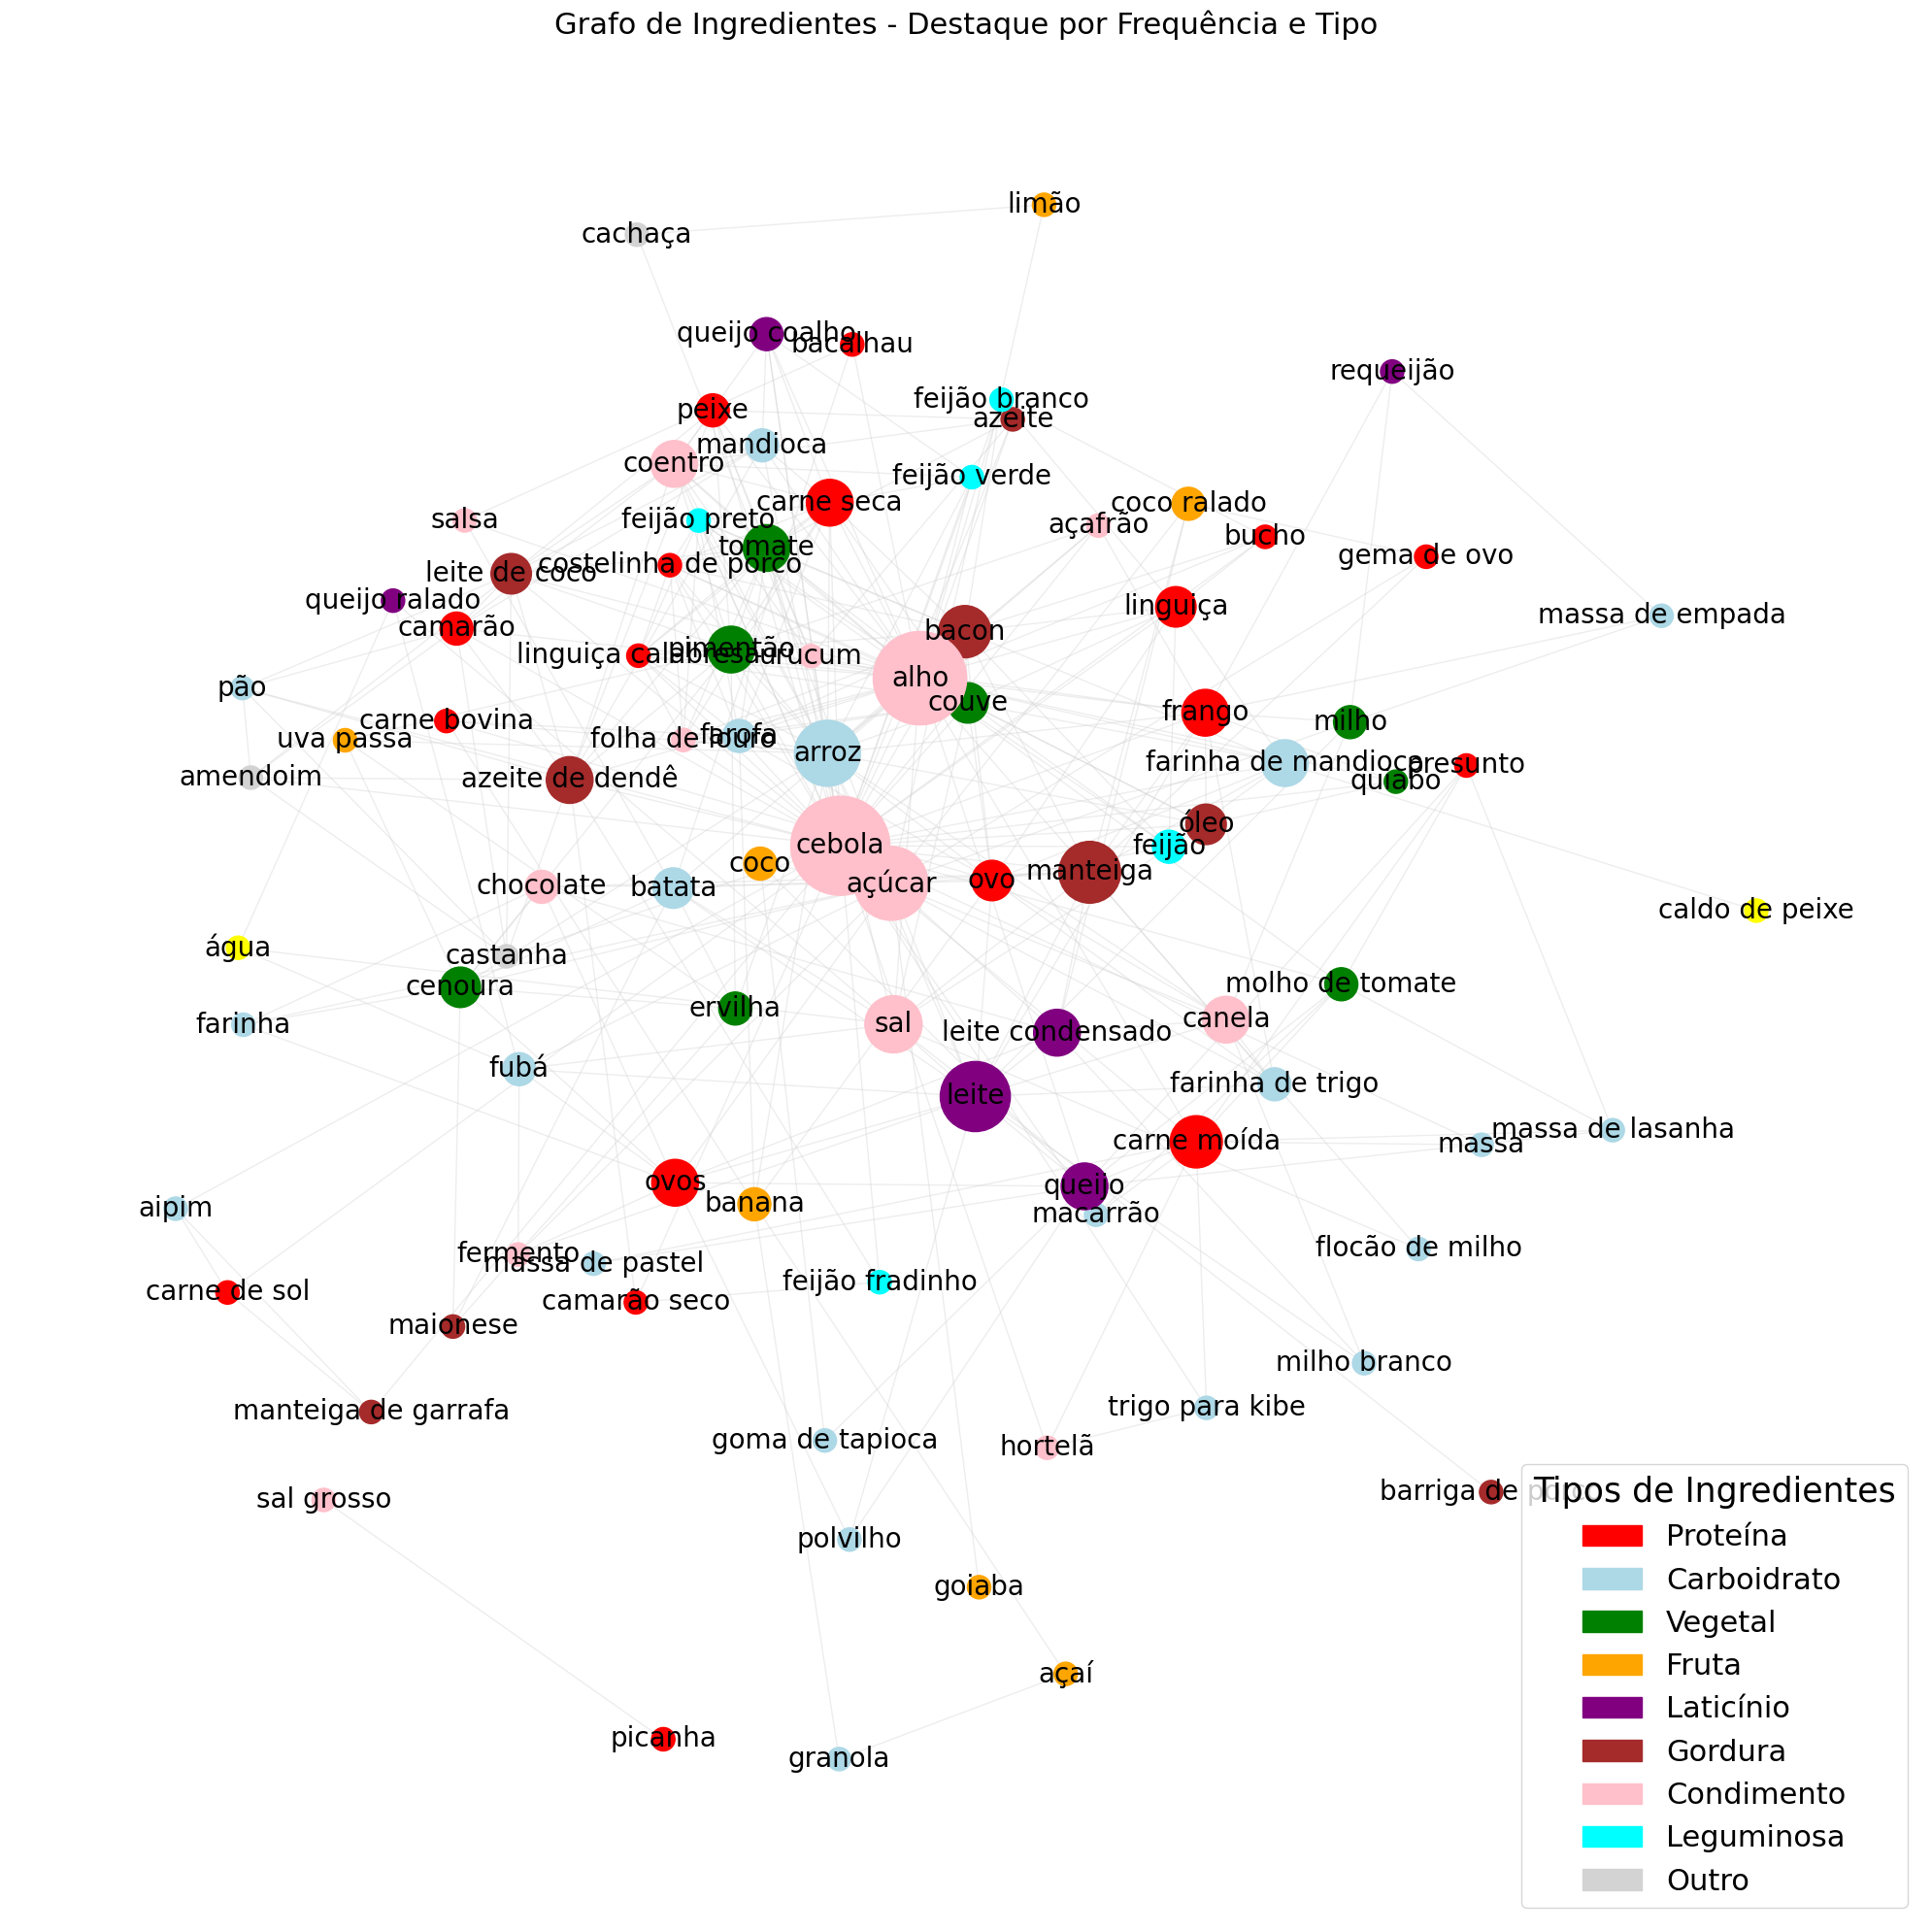

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter

# Contando a frequência dos ingredientes
frequencia = Counter()

for ingredientes in df['ingredientes']:
    lista_ingredientes = [i.strip() for i in ingredientes.split(',')]
    frequencia.update(lista_ingredientes)

# Definindo tamanhos dos nós proporcional à frequência
node_sizes = [frequencia.get(node, 1) * 200 for node in G.nodes()]

# Definindo cores por tipo
tipo_cores = {
    'proteína': 'red',
    'carboidrato': 'lightblue',
    'vegetal': 'green',
    'fruta': 'orange',
    'laticínio': 'purple',
    'gordura': 'brown',
    'condimento': 'pink',
    'leguminosa': 'cyan',
    'outro': 'lightgray'
}

node_colors = [tipo_cores.get(G.nodes[n]['tipo'], 'yellow') for n in G.nodes()]

# Plotando o grafo
plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G, seed=42, k=0.6)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=[s * 1.5 for s in node_sizes])
nx.draw_networkx_edges(G, pos, edge_color='lightgray', alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=20, font_color='black')

plt.title("Grafo de Ingredientes - Destaque por Frequência e Tipo", fontsize=22)
plt.axis('off')

# Legenda
legenda = [mpatches.Patch(color=cor, label=tipo.capitalize()) for tipo, cor in tipo_cores.items()]
plt.legend(handles=legenda, title="Tipos de Ingredientes", loc='lower right', fontsize=22, title_fontsize=25)

plt.tight_layout()
plt.savefig('grafo_ingredientes2.png', dpi=300, bbox_inches='tight')
plt.show()


### Frequência dos Ingredientes

O gráfico abaixo apresenta os **15 ingredientes mais frequentes** nas 51 receitas analisadas da culinária brasileira.

Podemos observar que ingredientes básicos e versáteis, como **cebola**, **alho**, **açúcar** e **leite**, estão entre os mais utilizados. Esses ingredientes são comuns em diversas preparações típicas, evidenciando sua importância na base da gastronomia nacional.

Além disso, condimentos e carboidratos aparecem com destaque, reforçando o papel de temperos e acompanhamentos na composição dos pratos brasileiros.


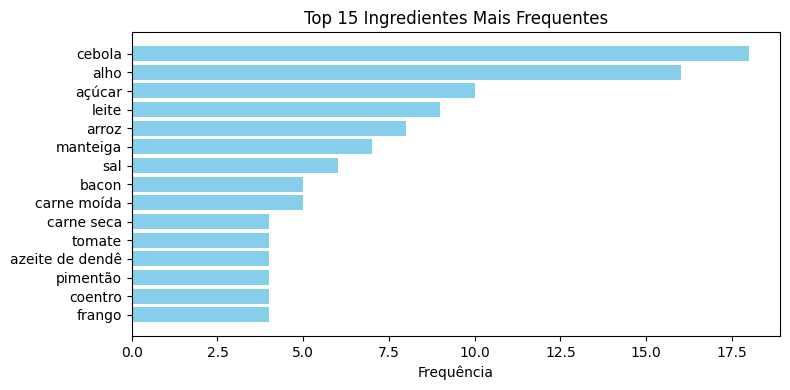

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar a frequência dos ingredientes
frequencia = Counter()

for ingredientes in df['ingredientes']:
    lista_ingredientes = [i.strip() for i in ingredientes.split(',')]
    frequencia.update(lista_ingredientes)

# Selecionar os 15 ingredientes mais frequentes
ingredientes_comuns = frequencia.most_common(15)
ingredientes, contagens = zip(*ingredientes_comuns)

# Plotar o gráfico de barras
plt.figure(figsize=(8,4))
plt.barh(ingredientes[::-1], contagens[::-1], color='skyblue')
plt.title('Top 15 Ingredientes Mais Frequentes')
plt.xlabel('Frequência')
plt.tight_layout()
plt.show()


### Distribuição dos Tipos de Ingredientes

Este gráfico de pizza demonstra a **proporção de cada tipo de ingrediente** presente no grafo de co-ocorrência.

Nota-se que categorias como **carboidratos**, **condimentos** e **proteínas** dominam a composição dos ingredientes, refletindo o equilíbrio típico da culinária brasileira entre sustância, sabor e variedade.

A presença significativa de **vegetais** e **gorduras** também destaca a diversidade de elementos que enriquecem os pratos regionais.


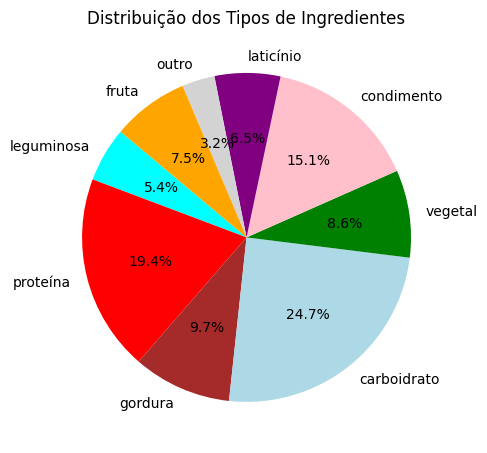

In [17]:
# Contar a quantidade de cada tipo no dicionário de ingredientes
tipo_counts = Counter(ingrediente_tipo_manual.values())

# Garantir que as cores sigam a ordem correta dos tipos
labels = list(tipo_counts.keys())
sizes = [tipo_counts[tipo] for tipo in labels]
cores = [tipo_cores[tipo] for tipo in labels]

# Plotar o gráfico de pizza com cores consistentes
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Tipos de Ingredientes')
plt.tight_layout()
plt.show()



### Origem Regional das Receitas

O gráfico a seguir apresenta a **distribuição das receitas por estado de origem**.

É possível perceber uma forte representatividade de estados como **Bahia**, **Minas Gerais** e **São Paulo**, que são conhecidos por suas ricas tradições culinárias. A diversidade regional é um dos pilares da gastronomia brasileira, e isso se reflete no número de pratos típicos oriundos dessas localidades.

Essa variedade geográfica contribui para a complexidade e riqueza do grafo de ingredientes, reforçando a análise de heterofilia observada.


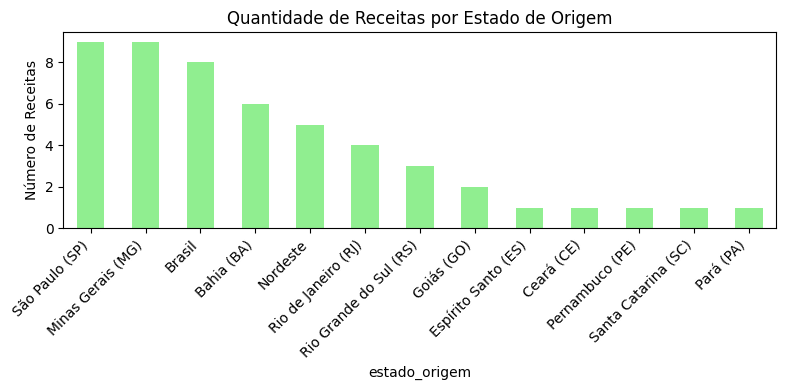

In [18]:
# Contar o número de receitas por estado
estados_counts = df['estado_origem'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(8,4))
estados_counts.plot(kind='bar', color='lightgreen')
plt.title('Quantidade de Receitas por Estado de Origem')
plt.ylabel('Número de Receitas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()